### Learning Outcomes of Modelling for Data Analysis

1. perform exploratory data analysis with descriptive statistics on given datasets;

2. construct models for inferential statistical analysis;

3. produce models for predictive statistical analysis

4. perform fundamental random sampling, simulation and hypothesis testing for required scenarios;

5. implement a model for data analysis through programming and scripting;

6. interpret results for a variety of models.

<h2>Question 1 - Confidence Intervals and Hypothesis Testing (20 marks)</h2>

Previously, we worked with a company who was making phone cases using a new 3D printing method. Because 3D printing is not a perfect process, management wanted to know how many samples they should produce to get a good approximation for the failure probability of the process.

This was several weeks ago, and the engineers have now begun testing the new 3D printing process. We are no longer concerned with whether a print is a "success" or "failure" - we are going to be more precise now. Although they will do more tests later, the engineers have performed an initial test run of 20 successful units (that is, they keep producing units until they have 20 "successful" prints).

For this question, we are going to assume that the 3D print thickness is normally distributed.

test.20.units <- read.csv("test20units.csv")$x
head(test.20.units)

In [ ]:
test.20.units <- read.csv("test20units.csv")$x
head(test.20.units)

[1] 1.1570958 0.9635302 1.0563128 1.0832863 1.0604268 1.0093875

**bold text**<h2>Question 1.a (2 marks)</h2>
We have decided that, for the 3D printing process to be considered a success, we are going to require the following facts to be true (with a confidence level $\alpha = 0.01$):

 - The mean print thickness must be 1mm
 - The confidence interval for the mean must be $\leq$ 0.1mm wide
 
We will test these facts by determining whether the corresponding values are within the 99% confidence intervals for our estimates, and also whether the wideness of our confidence intervals fits. That is, we will calculate a two-sided 99% confidence interval for the mean of the print thickness and see if 1mm is within that range, and whether that range has a total width $\leq$ 0.1mm wide.

Using R code, write a function conf.interval.mean.n, which takes two arguments (data and alpha) and returns a list containing two values:

 - list\$lower: the <b>lower</b> end of the two-sided confidence interval of the mean of $data$ with confidence level $alpha$
 
 - list\$upper: the <b>upper</b> end of the two-sided confidence interval of the mean of $data$ with confidence level $alpha$
 
<b>For this question, since we both have a small sample size and also don't know the standard deviation of the population (we are using the estimate from the sample)</b>
    
The function should look something like this:

    conf.interval.mean.t <- function(data, alpha) {
        # Your code here
    }
    
<b>Note: we are going to use hypothesis testing, rather than this confidence-interval based approach, later in this question. Hypothesis testing is a better way to determine whether the 3D printing process meets the requirements or not</b>

In [ ]:
conf.interval.mean.t <- function(data, alpha)
{
    avrg <- mean(data)
    Std_dv <- sd(data)
    n <- length(data)
    std_err <- Std_dv/sqrt(n)
    t_stat=qt(alpha/2, n-1, lower.tail=FALSE)*std_err
    conf_intv_lower = avrg - t_stat
    conf_intv_upper = avrg + t_stat
    return(list(conf_intv_lower,conf_intv_upper))
    
    

} 
# your code here

In [ ]:
t_stat=qt(0.001/2, 20-1, lower.tail=FALSE)


In [ ]:
ci.mean.20 <- conf.interval.mean.t(test.20.units, 0.01)
ci.mean.20

[[1]]
[1] 0.95522

[[2]]
[1] 1.123164

<h2>Question 1.b  (2 marks)</h2>
Are the two criteria established in Question 1.a met? That is, is the desired mean of 1mm thickness within the confidence interval, and is the confidence interval less than 0.1mm wide from the lower to upper bound?

Using this question as an example, why is it important to consider both whether the value is within the confidence interval <b>and</b> how wide the confidence interval is (relative to how wide an error we are allowed)?

In [ ]:
a=1.1231640483385-0.955219955546044
a

[1] 0.1679441

Since the confidence inteerwal width = 0.167 which is > 0.1 . However the mean lies within the confidence intervale 
Therefore criteria 1 is met whereas criteria 2 is not met

<h2>Question 1.c (6 marks)</h2>
The engineers have developed two alternative methods for 3D printing the phone cases. The engineers are now trying to minimize "warping" (which is where phone units are not printed flat and are instead warped slightly - this warping is measured in millimeters).

We have two datasets (one for each of the two new printing methods), where each dataset contains warping measurements from 50 prints produced using that dataset's 3D printing method. From our many tests with the original method, we know that the mean warping measurement for the original printing method is very close to 0.1mm (so we will use that as our estimate for the mean of the original population).

The engineers have asked us to determine whether either of their new 3D printing methods are superior to the original method. To do this, we could just calculate the mean of each dataset's measurements and compare that to the 0.1mm mean of the original method, but this does not take into account the variance introduced by sampling from the population. Instead, we will use hypothesis testing.

For each of the two new printing methods, each with datasets method1.50.units and method2.50.units respectively, we need to test the hypothesis that the mean of that method's dataset is <b>less</b> than the mean of the original population (i.e., less than 0.1mm). So, for each of the two printing methods, do the following (there are four cells below - the first cell imports the data, and the next three cells correspond to the following three points):

- Create a hypothesis test (defining the null hypothesis and alternative hypothesis). Note that this should be a <b>one-sided</b> test.
- Calculate a p-value using a t.test
- Interpret this p-value, using a confidence level $\alpha = 0.01$

When interpreting the p-value, keep in mind that the goal is to determine whether each of the new methods is better than the original method (in terms of warping).

<b>Do not use the inbuilt t.test function in R to answer this question. Use the formulas in the lecture notes to calculate the values from scratch. You may write your own version of a t-test function if you like, but you don't have to do this.</b>

In [ ]:
method1.50.units <- read.csv("method1_50units.csv")$x
method2.50.units <- read.csv("method2_50units.csv")$x

In [ ]:
sd(method1.50.units)           # calculate standar deviation of data

[1] 0.03173292

In [ ]:
sd(method2.50.units)        # calculate standar deviation of data

[1] 0.04459941

Null Hypothesis         H0 :$\mu$(method1.50.units) >= 0.1

Alternate Hypothesis    H1 :$\mu$( (method1.50.units) < 0.1                


In [ ]:
t_test_fn<-function(df){
n<-length(df)                            # calculate length of dataframe
mu<-0.1                                     # set population mean = 0.1    
t<- (mean(df) - mu)/(sd(df)/sqrt(n))                        # calculate t - statistic
prob<-pt(t,n-1)                       # get probability  value from pt() function
 print(list(t,prob))                
 return(prob)    
}
hypo_tst_1<-t_test_fn(method1.50.units)
hypo_tst_2<-t_test_fn(method2.50.units)
                                          # your code here


[[1]]
[1] -2.748737

[[2]]
[1] 0.004176281

[[1]]
[1] 0.4665702

[[2]]
[1] 0.6785624



Based on p values ,
pval for method_1 is 0.004176 which is < 0.01 , Hence reject null hypothesis
pval for method_2 is 0.6785 which is > 0.01 , Hence we do not reject null hypothesis
 

<h2>Question 1.d (3 marks)</h2>
When we use $\alpha = 0.01$ for a single hypothesis test, we expect to find a "false positive" (that is, we reject the null hypothesis when we should not have) in around 1 in 100 experiments.

However, in Question 1.c, we did two hypothesis tests (one for each of our two methods). We will consider the implications of this below.

Please do the following:
- Assuming that the probability of finding a false positive is 1% for each experiment, calculate the probability of finding at least 1 false positive overall (for two hypothesis tests).
- Calculate the probability of finding at least 1 false positive overall, if we tested 100 methods instead of just two.
- Briefly discuss something you think data scientists could do to reduce the risk of false positives when performing multiple hypothesis tests at once. Justify your answer.

Probability of atleast  1 error in m tests = $ 1-(1-\alpha)^m$ 
where   m=2 and $\alpha = 0.01$  
Therefore,
$ 1-(1- 0.01)^2 = 0.0199$ 

For 100 methods we have
where   m=100 and $\alpha = 0.01$  
Therefore,
$ 1-(1- 0.01)^100 = 0.6339$ 


<h2>Question 1.e (5 marks)</h2>
The engineers have decided, for other reasons than warping, to use one of the two new 3D printing methods instead of the old one. They would now like us to determine which of these two new printing methods is superior.

So, we need to test two hypotheses:

- That method 1 is superior to method 2 (i.e. method1 has a <b>lower</b> mean warping than method2)
- That method 2 is superior to method 1 (i.e. method2 has a <b>lower</b> mean warping than method1)

For each of methods 1 and 2, please do the following (there are three cells below, corresponding to the the following three points):

- Create a hypothesis test (defining the null and alternative hypotheses) which tests whether the chosen method is superior to the alternative method (i.e. either method 1 is superior to method 2, or method 2 is superior to method 1). Note that this should be a <b>one-sided</b> test.
- Calculate a p-value
- Interpret the p-value, using a confidence level $\alpha = 0.01$

<b>Do not use the inbuilt t.test function in R to answer this question. Use the formulas in the lecture notes to calculate the values from scratch. You may write your own version of a t-test function if you like, but you don't have to do this.</b>

$Hypothesis 1$

H0 : $\mu$(method1.50.units) > $\mu$(method2.50.units)

H1 : $\mu$(method1.50.units) <= $\mu$(method2.50.units)


$Hypothesis 2$

H0 : $\mu$(method1.50.units) < $\mu$(method2.50.units)

H1 : $\mu$(method1.50.units) >= $\mu$(method2.50.units)


In [ ]:
# for method_!
mu_method_1<-mean(method1.50.units)
mu_method_2<-mean(method2.50.units)                # find all parametres using function
sd_method_1<-sd(method1.50.units)
sd_method_2<-sd(method2.50.units)
l1<-length(method1.50.units)
l2<-length(method1.50.units)
t_test_1<-(mu_method_1 - mu_method_2)/sqrt((sd_method_1^2/l1) + (sd_method_2^2/l2))      # consider difference of means 
prob_1<- pt(t_test_1 , l1-1)            


#for method_2

t_test_2<-(mu_method_2 - mu_method_1)/sqrt((sd_method_1^2/l1) + (sd_method_2^2/l2))
prob_2<- pt(t_test_2 , l2-1)

prob_1
prob_2                                           # your code here

[1] 0.0270334

[1] 0.9729666

for method 1 = 0.0270334042248327 for $\alpha = 0.01$ since 0.027 > 0.01 , we do not reject null hypothesis

for method 2 = 0.972966595775167  for $\alpha = 0.01$ since 0.97 > 0.01 , we do not reject null hypothesis


<h2>Question 1.f (2 marks)</h2>
If you completed Question 1.e correctly, you should have found that the two p-values calculated (one for each of the two methods) sum to 1. Or, put another way, each p-value is $1 - $ the other p-value.



<h2>Question 2 - Logistic Regression (19 marks)</h2>

The engineers are now doing the first production run, which is going to take a while. One of your colleagues has challenged you to a game of chess while you wait for the test run to complete.

The game is being played by correspondance (meaning that you aren't playing over a board, and can do other things while you play). Your opponent neglected to tell you that they are a former Australian chess champion, and you have unfortunately found yourself in a tricky position.

Your opponent is now beginning to gloat, and has asked you to resign so as to not waste the time of such a great chess player as them (they're only kidding but it still hurts). You think that maybe you can use data science to determine whether the position is lost (meaning you should resign) or drawn (meaning you should keep playing and teach your colleague a lesson).

One of your other colleagues suggested that, since your opponent is so good, they surely should be able to win in ten turns or less. Your opponent has agreed to these rules - if they cannot beat you in ten turns, the game will be declared a draw.

You've found a dataset which contains thousands of chess positions where white has a rook and a king, and black has a king. Each entry in the original dataset also includes whether the position is winnable by white some number of turns (labelled by the number of turns, e.g. "one", "two", ..., "fifteen", "sixteen") or not (labelled "draw", since black can only draw with a king). In each position, it is black's turn to play.

The code cell below imports the dataset and does a small transformation on it, converting it from a 17-class problem ("draw", "one", "two", ..., "sixteen") to a binary problem ("loss" or "draw"), where a position is considered a draw if either black can force a draw, or if white cannot win within ten moves (with optimal play on both sides). Each entry in this transformed dataset contains the following information:

- The white king's file (a, b, c, d)
- The white king's rank (1, 2, 3, 4)
- The white rook's file (a, b, ..., h)
- The white rook's rank (1, 2, ..., 8)
- The black king's file (a, b, ..., h)
- The black king's rank (1, 2, ..., 8)
- The optimal end result of this position for black ("loss" if the position can be won by white in less than 10 moves, and "draw" otherwise). 

Notice that the white king's rank and file are always within 1-4 and a-d respectively. It appears that whoever prepared this dataset rotated the board so the white king was always in this quadrant, probably to reduce the number of variables in our model. This would be something we would have to worry about if we wanted to make this model work for any possible chess position; in any case, don't worry about this for the purposes of this assignment as it won't be an issue (your opponent's king happens to be in this quadrant so it's not a problem).

<b>Important Note: In this question, you might see the error message "prediction from a rank-deficient fit may be misleading..." show up. You can ignore this for the purposes of this assignment (try to think why we might be seeing a "rank-deficient" fit - there's a discussion at https://stats.stackexchange.com/questions/35071/what-is-rank-deficiency-and-how-to-deal-with-it if you're curious).</b>

<b>Background information</b> This dataset is derived from a real dataset, which was "generated by Michael Bain and Arthur van Hoff at the Turing Institute, Glasgow, UK". You can find the original dataset in the UCI repository at https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29 (but don't download the dataset from there; instead, use the code that we have provided below as well as the file "krkopt.data" on Moodle).

In [ ]:
N = 250

set.seed(42)

raw.df <- read.csv("krkopt.data")
names(raw.df) <- c("wk_file", "wk_rank", "wr_file", "wr_rank", "bk_file", "bk_rank", "result")

draws <- c("draw", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen")

draw.idx <- raw.df$result %in% draws
loss.idx <- !draw.idx

draw.df <- raw.df[draw.idx,]
loss.df <- raw.df[loss.idx,]

draw.df$result = 1
loss.df$result = 0

draw.df <- draw.df[sample(nrow(draw.df), N),]
loss.df <- loss.df[sample(nrow(loss.df), N),]

raw.df <- rbind(draw.df, loss.df)
raw.df <- raw.df[sample(nrow(raw.df)),]
head(raw.df)

,wk_file,wk_rank,wr_file,wr_rank,bk_file,bk_rank,result
3342,d,2,g,6,a,1,0
10816,c,1,a,4,h,8,1
8164,d,4,e,1,h,8,0
8534,b,1,g,5,d,1,0
9077,c,3,a,3,f,2,0
25779,a,1,e,2,g,3,1


<h2>Question 2.a (5 marks)</h2>
Before we can use our dataset, we need to preprocess it to make it suitable for use in a logistic regression. At the moment, our dataset consists of six feature variables, all of which are categorical, as well as one label variable (which is binary). We need to perform "one-hot encoding" on all of these categorical variables (i.e. all of the categorical variables, but not the binary label variable - think about why it would be useless to do one-hot encoding on a binary variable, if we're avoiding the dummy variable trap as discussed below).

One-hot encoding (referred to as "indicator variables" in the lectures - see slide 41 in week 8's lecture notes) is the process of taking a categorical feature (with $k$ possible values it can take) and converting it to a set of $k$ binary values (in practice we use $k-1$, to avoid the "dummy variable trap"). It is important to do this because, when categorical variables are encoded as a single integer (e.g. "red" = 1, "green" = 2, "blue" = 3, ...), a logistic regression (and many other modelling techniques) will fit the feature as though "red" is closer to "green" than it is to "blue" (since 1 is closer to 2 than to 3). So, we split the values up into individual variables to avoid this.

In fact, R's built-in logistic regression automatically performs one-hot encoding on factor variables prior to running the algorithm (but we're going to ignore that and implement the encoding ourselves instead). To learn more about one-hot encoding, Wikipedia has a good page on it at https://en.wikipedia.org/wiki/Dummy_variable_(statistics) (note that this technique goes by several names, including one-hot encoding, dummy variables, indicator variables, and a few others listed on the Wikipedia page).

When we perform one-hot encoding, we take the dataset and, for each column we wish to encode:

 - Find how many different values the factor variable can take, using the levels() function; call this number $k$
 - Create $k-1$ new columns in the data-frame, corresponding to each level of the factor. For each row, set the value to 1 if the original variable's value corresponded to the column, and 0 otherwise. If the variable took the last value of the factor (the $k$-th value), just set them all to 0. We use $k-1$ columns to avoid the "dummy variable trap" (https://en.wikipedia.org/wiki/Dummy_variable_(statistics))
 - Don't forget to delete the original factor column from the data frame when you're done

So, prepare our dataset as follows:

 1. Write a function to.factors, which takes the variables listed below and returns a data-frame identical to df, except that the columns listed in col.names have been converted to factor columns (you are allowed to use R's built-in as.factor() function here)
     - df is a data frame for which we wish to convert some variables to factors
     - col.names is a vector of strings, where each string corresponds to the name of a column in the data-frame which we want to convert to a factor column using the to.factor() function


 2. Write a function one.hot.encode, which takes two variables (df and to.encode) and returns a data-frame identical to df, except that the factor columns listed in to.encode have been replaced with one-hot encoding columns as described above
     - df is a data frame which we wish to apply one-hot encoding to
     - to.encode is a vector of strings, where each string corresponds to the name of a column in the data-frame which we want to convert from a factor column to a one-hot encoding
     
The column names for the one-hot encoding should take the following form:

    original_col_name.factor_name
    
For example, the column encoding when "wk_file" = "b" should have the name "wk_file_b", and the column encoding when "wr_rank" = 6 should have the name "wr_rank_6".

The to.factors function should look like this:

    to.factors <- function(df, col.names) {
        # Your code here
    }



The one.hot.encode function should look like this:
    
    one.hot <- function(df, to.encode) {
        # Your code here
    }

In [ ]:
factor.names <- c("wk_file", "wk_rank", "wr_file", "wr_rank", "bk_file", "bk_rank")
to.factors <- function(df, col.names) {
    for (i in col.names){                    
        df[[i]]<-as.factor(df[[i]])            # convert all columns to factors
    }

    return(df)
    }










one.hot <- function(df, to.encode) 
{
for (m in to.encode){
lt_of_levels = levels(df[,m])                             # FOR EACH COLUMN FIND LEVELS AND STORE IT IN A VARIABLE
n<-length(lt_of_levels)                         
    for ( k in lt_of_levels[-n]){                   # ITERATE THROUGH ALL DROPPING THE LAST "K" FACTOR
             df[paste0(m,sep="_",k)] <- ifelse(df[,m] == k,1,0)  
                                                                     # FORM COLUMNS AND ASSIGN VALUES ACCORDINGLY
             }
         } 
       
    df<-df[,-c(1:6)]                         # DROP THE ORIGINAL 6 COLUMNS 
    
    return(df)
}















In [ ]:
preprocess <- function(df, factor.names) {
    fact.df <- to.factors(df, factor.names)
    one.hot.df <- one.hot(fact.df, factor.names)
    
    return (one.hot.df)
}

factor.names <- c("wk_file", "wk_rank", "wr_file", "wr_rank", "bk_file", "bk_rank")
df.student.preprocessed <- preprocess(raw.df, factor.names)

head(df.student.preprocessed)

,result,wk_file_a,wk_file_b,wk_file_c,wk_rank_1,wk_rank_2,wk_rank_3,wr_file_a,wr_file_b,wr_file_c,...,bk_file_e,bk_file_f,bk_file_g,bk_rank_1,bk_rank_2,bk_rank_3,bk_rank_4,bk_rank_5,bk_rank_6,bk_rank_7
3342,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10816,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8534,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9077,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
25779,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<h2>Question 2.b (3 marks)</h2>
<b>Important note: the rest of the questions in Question 2 rely on the dataset created in Question 2.a. To ensure you are not disadvantaged when answering the rest of these questions, we have provided another dataset ("krkopt_preprocessed.csv") which is the expected result from the code in Question 2.a. You <i>must</i> use this new dataset for the remainder of Question 2 (the code cell immediately below this question will import the data as "df.processed") You can compare your output from Question 2.a to this dataset if you want to check your code for Question 2.a.</b>

We now have a dataset which has been preprocessed and is ready for use with R's built-in glm() function.

Perform the following steps in the code block two blocks down (under the block that reads "krkopt_preprocessed.csv"):

1. Use glm() to create a linear regression
2. Use the predict() function to find the estimated probabilities for the training set (using type="response") <b>Store these probabilities in a variable called "probs"</b>
3. Convert these probabilities into categorical predictions, and find the accuracy of the model. <b>Store these predictions in a variable called "preds".

The code block underneath this one plots the predicted probability of success (on the x-axis) vs. whether the print was a success or not (on the y-axis).

Do not import any libraries to do any of the above tasks, as they are doable in R without importing other libraries.

In [ ]:
df.processed <- read.csv("krkopt_preprocessed.csv")

head(df.processed)

result,wk_file_a,wk_file_b,wk_file_c,wk_rank_1,wk_rank_2,wk_rank_3,wr_file_a,wr_file_b,wr_file_c,...,bk_file_e,bk_file_f,bk_file_g,bk_rank_1,bk_rank_2,bk_rank_3,bk_rank_4,bk_rank_5,bk_rank_6,bk_rank_7
0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
names(df.processed)

[1] "result"    "wk_file_a" "wk_file_b" "wk_file_c" "wk_rank_1" "wk_rank_2"
 [7] "wk_rank_3" "wr_file_a" "wr_file_b" "wr_file_c" "wr_file_d" "wr_file_e"
[13] "wr_file_f" "wr_file_g" "wr_rank_1" "wr_rank_2" "wr_rank_3" "wr_rank_4"
[19] "wr_rank_5" "wr_rank_6" "wr_rank_7" "bk_file_a" "bk_file_b" "bk_file_c"
[25] "bk_file_d" "bk_file_e" "bk_file_f" "bk_file_g" "bk_rank_1" "bk_rank_2"
[31] "bk_rank_3" "bk_rank_4" "bk_rank_5" "bk_rank_6" "bk_rank_7"

In [ ]:
 model<-glm(result ~ ., family="binomial", data=df.processed)     # train model 
probs<-predict(model,type="response")                              # predict based on model
preds<-ifelse(probs > 0.5,1,0)                      # making categorical predictions based on thresholds               
preds       
# your code here

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   1   1   1   0   1   0   1   1   1   1   0   0   1   0   0   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   1   1   0   1   0   0   1   1   1   0   0   1   0   0   0   0   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   0   1   1   1   1   1   1   0   0   1   0   0   0   1   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   1   1   0   1   1   0   1   0   0   1   0   1   1   1   1   1   0   1   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   0   0   0   1   1   1   0   1   1   0   0   1   0   0   1   1   0   1   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   1   0   0   1   0   0   1   0   1   0   1   1   1   0   0   1   0   1   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   0   1   1   1   1   1   1   0   1   0   0   0   0   1   1   0   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   0   0   1   0   1   1   1   0   0   0   0   0   0   1   1   0   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   1   0   0   1   1   1   0   1   1   0   0   1   1   1   0   0   1   1   1 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  0   1   1   0   1   1   1   1   0   0   0   0   1   0   1   0   1   1   0   0 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  0   1   0   1   0   0   0   0   1   1   1   1   0   0   0   1   0   0   0   1 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   0   0   0   0   1   0   0   0   1   0   1   1   0   0   0   1   0   0   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   0   1   1   1   1   0   0   0   0   1   0   0   0   1   1   0   0   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  0   0   1   1   1   0   0   0   0   1   0   0   1   0   0   1   0   1   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  1   1   1   1   0   1   0   1   1   0   0   0   1   1   0   1   0   1   0   0 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   0   0   1   0   0   1   1   0   1   1   0   1   1   0   1   0   1   0   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  0   0   0   0   0   0   1   1   1   1   0   1   0   1   0   1   1   1   0   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  0   0   1   0   1   0   0   1   0   1   1   0   0   0   0   0   0   0   0   0 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   0   1   1   1   1   0   0   0   1   0   1   1   0   0   0   1   0   0   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   0   0   1   0   1   1   1   1   1   0   1   0   0   1   1   0   0   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  0   1   1   0   0   1   1   0   1   1   1   1   0   0   0   1   0   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   0   1   1   0   0   1   1   0   0   0   1   0   1   0   1   0   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  0   0   1   0   1   0   0   0   1   0   1   1   0   1   0   0   1   0   1   1 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  0   0   1   0   0   1   0   0  

     
preds   0   1
    0 213  35
    1  37 215

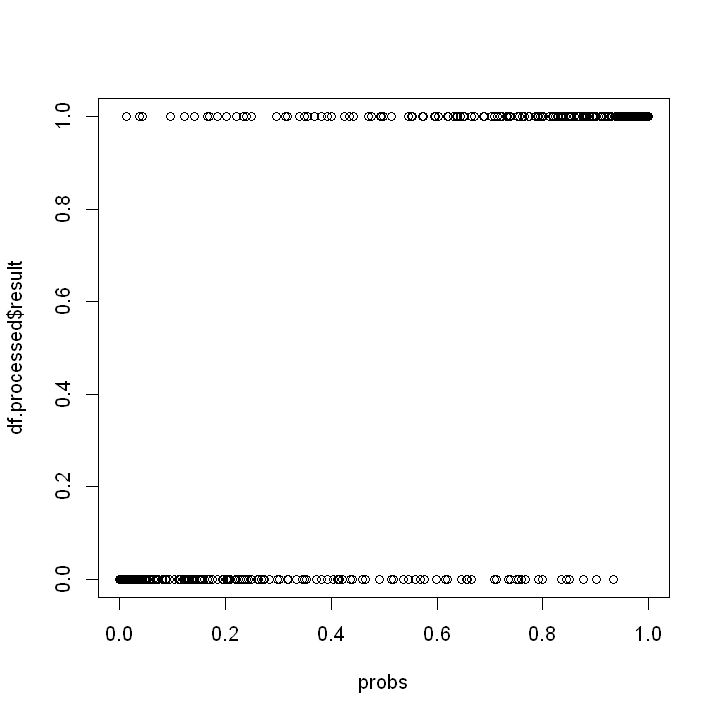

In [ ]:
plot(df.processed$result ~ probs)
table(preds, df.processed$result)

<h2>Question 2.c (4 marks)</h2>
The above model seems to do reasonably well, but let's see if we can do better using some variable selection.

You've been discussing your model with some of your colleagues, and they have made several suggestions:

 - One colleague has suggested that it does not matter where the rook or the white king is (<b>only</b> where the black king is); that is, we only need to consider the following variables:
 
     - bk_rank_1, bk_rank_2, ..., bk_rank_7
     - bk_file_a, bk_file_b, ..., bk_file_g


- Another colleague has suggested that it only matters where the white rook and king are (and <b>not</b> where the black king is); that is, we only need to consider the following variables:

     - wr_rank_1, wr_rank_2, ..., wr_rank_7
     - wr_file_a, wr_file_b, ..., wr_rank_g,
     - wk_rank_1, wk_rank_2, wk_rank_3
     - wk_file_a, wk_file_b, wk_file_c


 - Your opponent has heard what you've been up to, and they have suggested that it only matters where the white rook is (not the black or white king king). You don't trust them, but you'll give it a try... you only need to consider the following variables:
 
     - wr_rank_1, wr_rank_2, wr_rank_3
     - wr_file_a, wr_file_b, wk_file_c
     
For each of these three proposals, create a linear model which only contains those variables. Then calculate the accuracy of each of these models using the evaluate function provided.

In [ ]:
evaluate <- function(fit, truth) {
    probs <- predict(fit, type="response")
    preds <- probs > 0.5
    accuracy <- mean(preds == truth)
    
    return (accuracy)
}

In [ ]:
model_1<-glm(result ~bk_rank_1 +bk_rank_2+bk_rank_3+bk_rank_4+bk_rank_5+bk_rank_6+bk_rank_7+bk_file_a+bk_file_a+bk_file_b+bk_file_c+bk_file_d+bk_file_e+bk_file_f+bk_file_g, family="binomial", data=df.processed) 
model_2<-glm(result ~wr_rank_1 +wr_rank_2+wr_rank_3+wr_rank_4+wr_rank_5+wr_rank_6+wr_rank_7+wr_file_a+wr_file_b+wr_file_c+wr_file_d+wr_file_e+wr_file_f+wr_file_g+wk_rank_1+wk_rank_2+wk_rank_3+wk_file_a+wk_file_b+wk_file_c, family="binomial", data=df.processed)
model_3<-glm(result ~wr_rank_1+wr_rank_2+wr_rank_3+wr_file_a+wr_file_b+wr_file_c,family="binomial", data=df.processed) 
accuracy_1<-evaluate(model_1,df.processed$result)
accuracy_2<-evaluate(model_2,df.processed$result)
accuracy_3<-evaluate(model_3,df.processed$result)                     # select and train data only based on given clumn names 
print(accuracy_1)
print(accuracy_2)       # print accuracy 
print(accuracy_3)

# your code here

[1] 0.798
[1] 0.686
[1] 0.546


<h2>Question 2.d (1 mark)</h2>
We can also use an automated, step-wise process to determine remove variables, using R's built-in step() function.

The code to do this is already given to you in the first code cell below, as a function called "to.stepwise". You need to call this function in the second code cell below, two times. Each time will use a different value of k:

 - fit.aic: uses k = 2
 - fit.bic: uses k = log(N) where your dataset has N rows

You should then run the third code cell below, which will call your evaluate() function on fit.aic and fit.bic. Take a look at how the AIC and BIC models do in comparison to the three models we came up with above (we'll discuss this in the next question).

In [ ]:
to.stepwise <- function(df, k) {
    fit <- glm(result ~ ., family="binomial", data=df)
    return (step(fit, k=k))
}

In [ ]:
n<-nrow(df.processed)
fit.aic<-to.stepwise(df.processed,2)
fit.bic<-to.stepwise(df.processed,log(n))# your code here

Start:  AIC=377.33
result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wk_rank_2 + 
    wk_rank_3 + wr_file_a + wr_file_b + wr_file_c + wr_file_d + 
    wr_file_e + wr_file_f + wr_file_g + wr_rank_1 + wr_rank_2 + 
    wr_rank_3 + wr_rank_4 + wr_rank_5 + wr_rank_6 + wr_rank_7 + 
    bk_file_a + bk_file_b + bk_file_c + bk_file_d + bk_file_e + 
    bk_file_f + bk_file_g + bk_rank_1 + bk_rank_2 + bk_rank_3 + 
    bk_rank_4 + bk_rank_5 + bk_rank_6 + bk_rank_7

            Df Deviance    AIC
- wr_file_f  1   307.33 375.33
- bk_rank_3  1   307.34 375.34
- wr_rank_6  1   307.34 375.34
- wr_file_d  1   307.40 375.40
- wr_rank_2  1   307.55 375.55
- wr_file_b  1   307.57 375.57
- wr_file_g  1   307.90 375.90
- wk_rank_3  1   307.97 375.97
- wr_rank_1  1   308.16 376.16
- wr_file_e  1   308.41 376.41
- wr_file_a  1   308.54 376.54
- bk_file_b  1   308.61 376.61
<none>           307.33 377.33
- wr_rank_7  1   309.50 377.50
- wr_file_c  1   309.67 377.67
- wk_rank_2  1   310.34 378.34
- bk_ran

In [ ]:
evaluate(fit.aic, df.processed$result)
evaluate(fit.bic, df.processed$result)

[1] 0.86

[1] 0.856

<h2>Question 2.e (2 marks)</h2>
The step-wise AIC method, if implemented correctly, should find the formula

    result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wk_rank_2 + 
        wr_file_a + wr_file_c + wr_file_e + wr_rank_3 + wr_rank_4 + 
        wr_rank_5 + wr_rank_7 + bk_file_a + bk_file_b + bk_file_c + 
        bk_file_d + bk_file_e + bk_file_f + bk_file_g + bk_rank_1 + 
        bk_rank_2 + bk_rank_4 + bk_rank_5 + bk_rank_6 + bk_rank_7
    
with accuracy at around 0.86.

The step-wise BIC method, if implemented correctly, should find the formula

    result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wr_rank_3 + 
        wr_rank_4 + wr_rank_5 + bk_file_a + bk_file_c + bk_file_d + 
        bk_file_e + bk_file_f + bk_file_g + bk_rank_1 + bk_rank_2 + 
        bk_rank_5 + bk_rank_7

with accuracy at around 0.856.

Given all this information, were any of your colleagues right? Or were they all wrong? Also, can you draw a conclusion from the formula found by BIC as to which pieces are important to have in the right position (out of the white king, the black king or the white rook)? Be sure to justify your answer.

<h2>Question 2.f (2 marks)</h2>
You have finished your model, and have decided to use the AIC model (which should be saved as a variable named "fit.aic"). You now want to apply your model to the chess position you find yourself in against your colleague.

You are in the following position (it's your move, i.e. black's move):

<img src="chess_pos.png" alt="drawing" width="200"/>
<!--![Chess Position](chess_pos.png)-->

<i>Note: the above image will only show if you include the file "chess_pos.png" (contained in the "data.zip" file you've been given on Moodle) in the same folder as this Jupyter notebook, and then re-run this Markdown cell by putting it into edit mode and then running it. Alternatively, you can just look at the file itself.</i>

This position has the following variable values:
 
 - wk_file = c
 - wk_rank = 3
 - wr_file = f
 - wr_rank = 5
 - bk_file = e
 - bk_rank = 5

You will need to convert this position into a dataframe of one row with the one-hot encoding we used above, and then pass this into the predict function using the model "fit.aic" and using type="response" for the predict function to get a probability.

Do this in the cell below and see what result you get. Then, in the Markdown cell below that, state whether your model indicates that you truly should resign in this position (i.e. the position is lost) or whether your opponent was bluffing (i.e. the position does not seem to be winnable in less than 10 moves).

<b>Note: you might be tempted to create a simple dataframe with one row and convert this to one-hot encoding using the functions you have defined above - this probably won't work, and we recommend that you create the dataframe using some other method. If you're curious, try to think about why this is the case.</b>

<b>Hint: This Stack-Overflow post might help: https://stackoverflow.com/questions/10689055/create-an-empty-data-frame. In particular, consider how to use the line
    
    empty_df <- df[FALSE,]
    
</b>

In [ ]:
empty_df<-df.processed[FALSE,]
empty_df[1,]<-c(0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0)
fit.aic_1<-to.stepwise(empty_df[1,],2)
pr<-predict(fit.aic_1,type="response")
pr<-ifelse(pr > 0.5,1,0)
pr

Start:  AIC=2
result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wk_rank_2 + 
    wk_rank_3 + wr_file_a + wr_file_b + wr_file_c + wr_file_d + 
    wr_file_e + wr_file_f + wr_file_g + wr_rank_1 + wr_rank_2 + 
    wr_rank_3 + wr_rank_4 + wr_rank_5 + wr_rank_6 + wr_rank_7 + 
    bk_file_a + bk_file_b + bk_file_c + bk_file_d + bk_file_e + 
    bk_file_f + bk_file_g + bk_rank_1 + bk_rank_2 + bk_rank_3 + 
    bk_rank_4 + bk_rank_5 + bk_rank_6 + bk_rank_7


Step:  AIC=2
result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wk_rank_2 + 
    wk_rank_3 + wr_file_a + wr_file_b + wr_file_c + wr_file_d + 
    wr_file_e + wr_file_f + wr_file_g + wr_rank_1 + wr_rank_2 + 
    wr_rank_3 + wr_rank_4 + wr_rank_5 + wr_rank_6 + wr_rank_7 + 
    bk_file_a + bk_file_b + bk_file_c + bk_file_d + bk_file_e + 
    bk_file_f + bk_file_g + bk_rank_1 + bk_rank_2 + bk_rank_3 + 
    bk_rank_4 + bk_rank_5 + bk_rank_6


Step:  AIC=2
result ~ wk_file_a + wk_file_b + wk_file_c + wk_rank_1 + wk_rank_2 + 
    wk_r

1 
0

<h2>Question 2.g (2 marks)</h2>
In our code above (and also in the code in Question 3), we train our models using all of our training data, and also evaluate the models on our training data. Describe a problem with this approach, and give an example of how we could fix this (other than leave-one-out cross-validation, which is used in Question 3).

The modelwhen trained on only training data will often predict only similar data set and will perform poorly as it is not a  generalised model

<h2>Question 3 - Linear Regression (20 marks)</h2>

Just as you give your opponent the finishing move that draws your chess game (which is no small feat against an Australian champion - you have the admiration of your colleagues), the engineers come running into your office in a panic. They tell you that their deadline for finishing their 3D printing process is tomorrow, but that they are still having trouble solving a problem with their printing process.

They have printed 50 test cases, with varying degrees of success. They have found that a large number of their cases turn out very rough to the touch; they are concerned that management will see this and scrap the 3D printing project altogether (and their jobs with it!).

You calmly ask them to send over all the data they have, and get to work developing a linear regression model to try to identify which component(s) of the process are causing the roughness problem.

<b>Important Note: In this question, you might see the error message "prediction from a rank-deficient fit may be misleading..." show up. You can ignore this for the purposes of this assignment (try to think why we might be seeing a "rank-deficient" fit - there's a discussion at https://stats.stackexchange.com/questions/35071/what-is-rank-deficiency-and-how-to-deal-with-it if you're curious).</b>

<b>Background information</b> This dataset is derived from a real dataset, which was uploaded to Kaggle on 9/14/2018 by Ahmet Okudan. The Kaggle upload indicates that the dataset "comes from research by TR/Selcuk University Mechanical Engineering department". More information can be found at https://www.kaggle.com/afumetto/3dprinter

In [ ]:
data.3d <- read.csv("data.csv")
data.3d <- data.3d[,-c(11, 12)]
head(data.3d)

layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness
0.02,8,90,grid,220,60,40,abs,0,25
0.02,7,90,honeycomb,225,65,40,abs,25,32
0.02,1,80,grid,230,70,40,abs,50,40
0.02,4,70,honeycomb,240,75,40,abs,75,68
0.02,6,90,grid,250,80,40,abs,100,92
0.02,10,40,honeycomb,200,60,40,pla,0,60


In [ ]:
N<-nrow(data.3d)
N

[1] 50

<h2>Question 3.a (1 mark)</h2>

First things first - we need to take a look at our data. Write a function "plot.variables" which takes two arguments - var.x and var.y. It then plots var.x vs var.y. Make sure your plots have a reasonable label (e.g. var.x vs var.y, substituting in the actual values of var.x and var.y) as well as reasonable x-axis and y-axis labels (e.g. var.x on the x-axis and var.y on the y-axis, again substituting the actual values of var.x and var.y).

Your function should look like this:

    plot.variables <- function(var.x, var.y) {
        # Your code here
    }
    
Then run the second code cell below, which will plot out all your other variables vs roughness.

In [ ]:
plot.variables <- function(var.x, var.y) {
    plot(data.3d[,var.x],data.3d[,var.y],col="red",xlab = var.x,ylab = var.y)
   
}                                                                                   # your code here

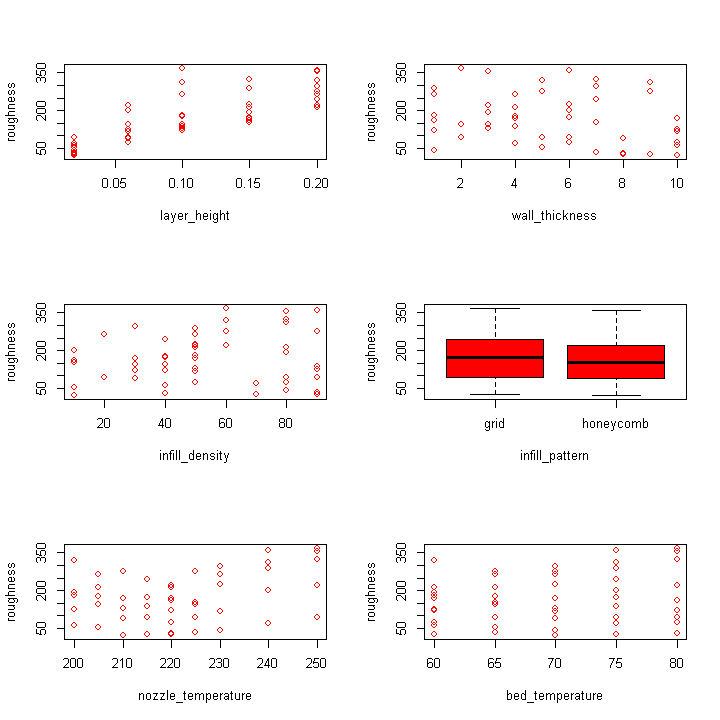

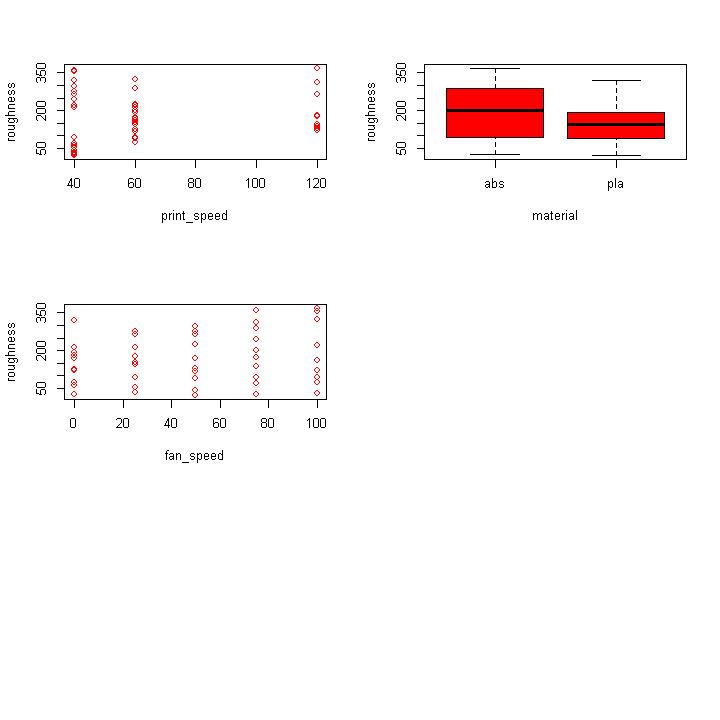

In [ ]:
par(mfrow=c(3, 2))

options(repr.plot.width=6, repr.plot.height=6)

for (name in names(data.3d)) {
    if (name != "roughness") {
        plot.variables(name, "roughness")
    }
}

<h2>Question 3.b (1 mark)</h2>

Now we have an idea of what our dataset looks like, we can start working on creating a linear model. Using R's built-in lm() function, create a linear model of roughness vs all the other variables in our dataset. Save this model in a variable called "fit.lm"

In [ ]:
fit.lm<-lm(roughness ~.,data= data.3d)
    # your code here

In [ ]:
fit.lm


Call:
lm(formula = roughness ~ ., data = data.3d)

Coefficients:
            (Intercept)             layer_height           wall_thickness  
             -2.371e+03                1.269e+03                2.334e+00  
         infill_density  infill_patternhoneycomb       nozzle_temperature  
             -4.231e-02               -1.255e-01                1.506e+01  
        bed_temperature              print_speed              materialpla  
             -1.613e+01                6.496e-01                2.985e+02  
              fan_speed  
                     NA  


<h2>Question 3.c (1 mark)</h2>

It would be nice to get an idea of how our estimates compare with the true roughness values using a graph. In the code cell below, use R to create a plot of the predicted roughness (using our linear model) on the x-axis vs the actual roughness on the y-axis.

Like in Question 3.a, make sure to use a reasonable label for both your plot and your axes.

Warning message in predict.lm(fit.lm, data.3d):
"prediction from a rank-deficient fit may be misleading"

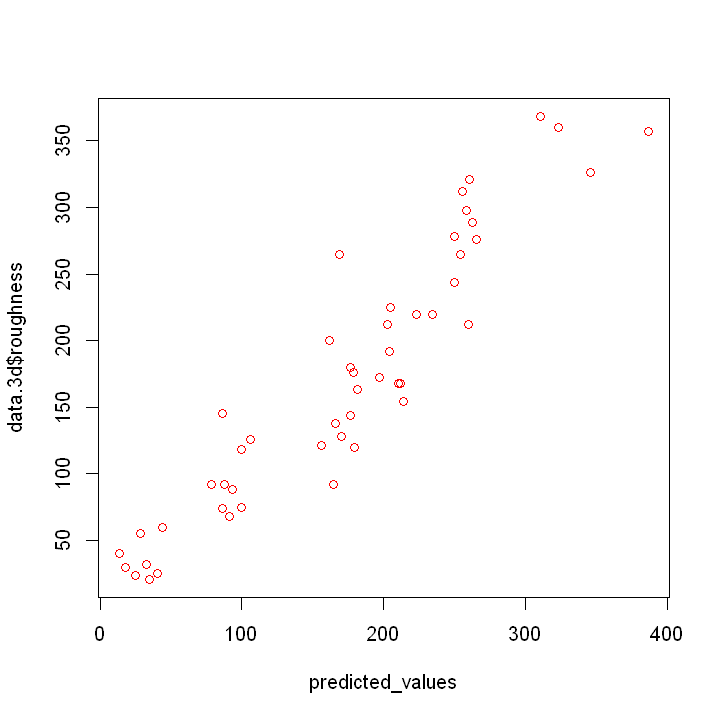

In [ ]:
predicted_values <- predict(fit.lm,data.3d)
plot(predicted_values,data.3d$roughness, col="red")# your code here

<h2>Question 3.d (2 marks)</h2>

The graph seems to indicate that our model does reasonably well, but we would like to have more mathematically-sound way of determining how close our model gets, on average.

Write a function, "mean.sq.error", which takes two arguments (model and df) and returns the mean <b>squared</b> error of the predictions determined by model and df.

Then write another function, "mean.abs.error", which takes two arguments (model and df) and returns the mean <b>absolute</b> error of the predictions determined by model and df.

Your MSE function should look like this:

    mean.sq.error <- function(model, df) {
        # Your code here
    }
    
Your MAE function should look like this:

    mean.abs.error <- function(model, df) {
        # Your code here
    }

You may assume that "roughness" is the name of the target variable for the dataframe passed into your function (i.e., you can hard-code this into the function).

In [ ]:
mean.sq.error <- function(model, df) {
    
    predicted_values <- predict(model,df)
    mse<-mean((data.3d$roughness - predicted_values)^2)
    return(mse)
}
mean.abs.error <- function(model, df) {
    
    predicted_values <- predict(model,df)
    mae<-mean(abs(df$roughness - predicted_values))
    return(mae)                                                                        # Your code here
}                                                                # Your code here

In [ ]:
mean.sq.error(fit.lm, data.3d)
mean.abs.error(fit.lm, data.3d)

Warning message in predict.lm(model, df):
"prediction from a rank-deficient fit may be misleading"

[1] 1199.352

Warning message in predict.lm(model, df):
"prediction from a rank-deficient fit may be misleading"

[1] 27.60211

<h2>Question 3.e (1 mark)</h2>

We need to narrow down what could be the cause for print roughness; we will use some variable selection to do this. Like in Question 2.d, we've given you the code for running step-wise variable selection, although (again, like in Question 2.d) you need to provide the values of k for the AIC (k = 2) and BIC (k = log(N) for N data points in our dataset). You need to call this function in the second code cell below, two times. Each time will use a different value of k:

 - fit.lm.aic: uses k = 2
 - fit.lm.bic: uses k = log(N) where your dataset has N rows

You should then run the third code cell below, which will call your mean.sq.error() and mean.abs.error() functions on fit.lm.aic and fit.lm.bic. Take a look at how the AIC and BIC models do in comparison to the three models we came up with above (although you don't have to discuss this in your answer).

In [ ]:
to.stepwise <- function(df, k) {
    fit <- lm(roughness ~ ., data=df)
    return (step(fit, k=k))
}

In [ ]:
N<-nrow(data.3d)
fit.lm.aic<- to.stepwise(data.3d,2)
fit.lm.bic<- to.stepwise(data.3d,log(N)) 
N# your code here

Start:  AIC=372.48
roughness ~ layer_height + wall_thickness + infill_density + 
    infill_pattern + nozzle_temperature + bed_temperature + print_speed + 
    material + fan_speed


Step:  AIC=372.48
roughness ~ layer_height + wall_thickness + infill_density + 
    infill_pattern + nozzle_temperature + bed_temperature + print_speed + 
    material

                     Df Sum of Sq    RSS    AIC
- infill_pattern      1         0  59968 370.48
- infill_density      1        48  60015 370.52
- wall_thickness      1      1663  61630 371.84
<none>                             59968 372.48
- print_speed         1     14538  74505 381.33
- bed_temperature     1     36006  95973 393.99
- material            1     38246  98213 395.14
- nozzle_temperature  1     51832 111800 401.62
- layer_height        1    306817 366785 461.03

Step:  AIC=370.48
roughness ~ layer_height + wall_thickness + infill_density + 
    nozzle_temperature + bed_temperature + print_speed + material

                    

[1] 50

In [ ]:
mean.sq.error(fit.lm, data.3d)
mean.sq.error(fit.lm.aic, data.3d)
mean.sq.error(fit.lm.bic, data.3d)

mean.abs.error(fit.lm, data.3d)
mean.abs.error(fit.lm.aic, data.3d)
mean.abs.error(fit.lm.bic, data.3d)

Warning message in predict.lm(model, df):
"prediction from a rank-deficient fit may be misleading"

[1] 1199.352

[1] 1233.34

[1] 1233.34

Warning message in predict.lm(model, df):
"prediction from a rank-deficient fit may be misleading"

[1] 27.60211

[1] 27.75499

[1] 27.75499

<h2>Question 3.f (4 marks)</h2>

Both the AIC and BIC models identify the same formula, and therefore remove the same variables:

    roughness ~ layer_height + nozzle_temperature + bed_temperature + print_speed + material
   
   
Use the summary() function on "fit.lm", "fit.lm.aic", and "fit.lm.bic" in the cell block below.

In the markdown cell below the code cell, answer the following three questions:

1. Do the variables removed by AIC and BIC all have large p-values?
2. What does it means to have a large p-value?
3. Why it is reasonable that your answer to the first of these three questions ("Do the variables removed by AIC and BIC all have large p-values?") would be what we expect to happen? You can answer this using intuition; you don't need to mathematically prove it.

In [ ]:
summary(fit.lm)   
summary(fit.lm.aic)   
summary(fit.lm.bic)   
                                # your code here


Call:
lm(formula = roughness ~ ., data = data.3d)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.746 -24.332  -1.641  20.304  96.552 

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.371e+03  3.716e+02  -6.379 1.25e-07 ***
layer_height             1.269e+03  8.765e+01  14.483  < 2e-16 ***
wall_thickness           2.334e+00  2.189e+00   1.066  0.29259    
infill_density          -4.231e-02  2.341e-01  -0.181  0.85742    
infill_patternhoneycomb -1.255e-01  1.128e+01  -0.011  0.99117    
nozzle_temperature       1.506e+01  2.529e+00   5.953 5.05e-07 ***
bed_temperature         -1.613e+01  3.251e+00  -4.962 1.27e-05 ***
print_speed              6.496e-01  2.060e-01   3.153  0.00302 ** 
materialpla              2.985e+02  5.836e+01   5.114 7.78e-06 ***
fan_speed                       NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '


Call:
lm(formula = roughness ~ layer_height + nozzle_temperature + 
    bed_temperature + print_speed + material, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.084 -26.500  -1.662  22.585  92.356 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2310.7356   353.2009  -6.542 5.38e-08 ***
layer_height        1246.5353    83.1780  14.986  < 2e-16 ***
nozzle_temperature    14.7774     2.3979   6.163 1.95e-07 ***
bed_temperature      -15.8078     3.0895  -5.117 6.55e-06 ***
print_speed            0.5538     0.1804   3.070  0.00366 ** 
materialpla          294.1610    56.1586   5.238 4.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.44 on 44 degrees of freedom
Multiple R-squared:  0.8717,	Adjusted R-squared:  0.8571 
F-statistic: 59.78 on 5 and 44 DF,  p-value: < 2.2e-16



Call:
lm(formula = roughness ~ layer_height + nozzle_temperature + 
    bed_temperature + print_speed + material, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.084 -26.500  -1.662  22.585  92.356 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2310.7356   353.2009  -6.542 5.38e-08 ***
layer_height        1246.5353    83.1780  14.986  < 2e-16 ***
nozzle_temperature    14.7774     2.3979   6.163 1.95e-07 ***
bed_temperature      -15.8078     3.0895  -5.117 6.55e-06 ***
print_speed            0.5538     0.1804   3.070  0.00366 ** 
materialpla          294.1610    56.1586   5.238 4.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.44 on 44 degrees of freedom
Multiple R-squared:  0.8717,	Adjusted R-squared:  0.8571 
F-statistic: 59.78 on 5 and 44 DF,  p-value: < 2.2e-16


<h2>Question 3.g (3 marks)</h2>

It is a problem that we are training and evaluating on the same dataset (in Question 2.g, we asked you to discuss why this is the case).

One way to mitigate this problem is by using "leave-one-out cross validation", or LOOCV (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation). In LOOCV, for a dataset of size $N$ we train $N$ different models, where each model trains on all but one of the points in our dataset. We then evaluate the squared error from each model predicting the point we left out (hence the name "leave-one-out" CV), and average the final result.

In the code cell below, implement a function "cv.loo", which takes as argument a dataset "df" and returns the average <b>squared prediction error</b> from LOOCV done on that dataset. You may assume that "roughness" is the name of the target variable for the dataframe passed into your function (i.e., you can hard-code this into the function).

Your function should look something like this:

    cv.loo <- function (df) {
        # Your code here
    }

In [ ]:
cv.loo <- function (df){
    sq_predct_error_sum<-0
    N<-nrow(df)
    for( i in 1:N)
    {
    train_data<-data.3d[-i,]                     # drop the ith column for training data 
    test_data<-data.3d[i,]                      # consider the dropped row only for traaining set
    MODEL<-lm(roughness ~ ., data=train_data)
    
    predicted_values <- predict(MODEL,test_data)               # predict 
    sq_pred_er<-(test_data$roughness-predicted_values)^2         # find mse
    sq_predct_error_sum<-sq_predct_error_sum + sq_pred_er
    }
    sq_predct_error_sum<-sq_predct_error_sum/N
    return(sq_predct_error_sum)
}   
                               # your code here

In [ ]:
train_data<-data.3d[-1,]
test_data<-data.3d[1,]



In [ ]:
cv.loo(data.3d)

Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(MODEL, test_data):
"predi

1 
1831.23

<h2>Question 3.h (2 marks)</h2>

The LOOCV error calculated in Question 3.g, if calculated correctly, was significantly higher than the training MSE. Why might this be the case? Describe one approach we might take to reduce this problem.

This is  because the training sets in LOOCV have more overlap. This makes the estimates from different folds more dependent THEREFORE MORE VARIANCE 

Kfold  cross validation can be a better approach



This is  because the training sets in LOOCV have more overlap. This makes the estimates from different folds more dependent THEREFORE MORE VARIANCE 

Kfold  cross validation can be a better approach



<h2>Question 3.i (1 mark)</h2>
In the code above, we use the LOOCV technique to help solve the problem (discussed in Question 2.g) where we evaluate on the trianing set. However, aside from validation techniques like this, it is also common to set aside another <i>testing</i> dataset, which we use at the very end of training our model as a final evaluation. For simplicity, we did not do this here (although perhaps we should have). Why do you think this is considered good practice? You might like to do some research on this (just be careful not to accidentally plaigarise your answer from another source).

It can a generate a better , more generalised model  without undefitting or overfitting 

<h2>Question 3.j (4 marks)</h2>

The engineers are eagerly awaiting your analysis of their situation. Summarize your findings from the previous parts of this question, being sure to address the following points:

1. Which variables do not appear to be related to roughness?
2. Which variables do appear to be related to roughness?


1)The variables influencing the roughness are infill_pattern and material 
where they show some variation for different infill patterns and materials

2)aThe factors such as layer_height,wall_thickness,infill_density , nozzle_temperature	bed_temperature	,print_speed ,fan_speed
do not affect the roughness 

